### Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pickle

### Import Dataset

In [3]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


**Data Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


**Data Description**

In [5]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


**Select Data where Age greater than or equal to 18**

In [6]:
df = df[df["Age"] >= 18]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          821 non-null    int64  
 1   SystolicBP   821 non-null    int64  
 2   DiastolicBP  821 non-null    int64  
 3   BS           821 non-null    float64
 4   BodyTemp     821 non-null    float64
 5   HeartRate    821 non-null    int64  
 6   RiskLevel    821 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 51.3+ KB


**Label Encoding on Target**

In [87]:
def risk_level(x):
    if x == "low risk":
        return 0
    elif x == "mid risk":
        return 1
    else:
        return 2
    
df["RiskLevel"] = df["RiskLevel"].apply(risk_level)

**Correlation**

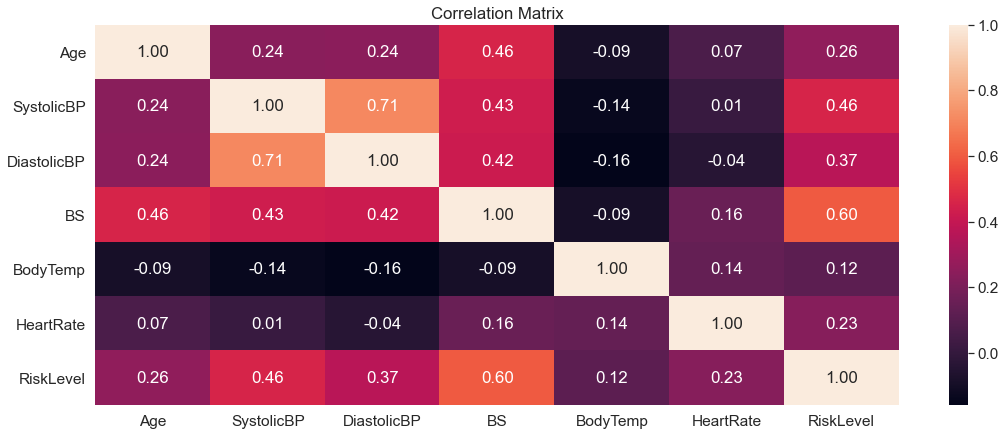

In [88]:
sns.set(font_scale=1.4)
plt.figure(figsize=(18, 7))
correlation=df.corr()
sns.heatmap(correlation, annot = True, fmt = ".2f")
plt.title("Correlation Matrix")
plt.savefig("Correlation.png")
plt.show()

**Original Target Name**

In [8]:
def risk_level(x):
    if x == 0:
        return "low risk"
    elif x == 1:
        return "mid risk"
    else:
        return "high risk"
    
df["RiskLevel"] = df["RiskLevel"].apply(risk_level)

**Feature Importance**

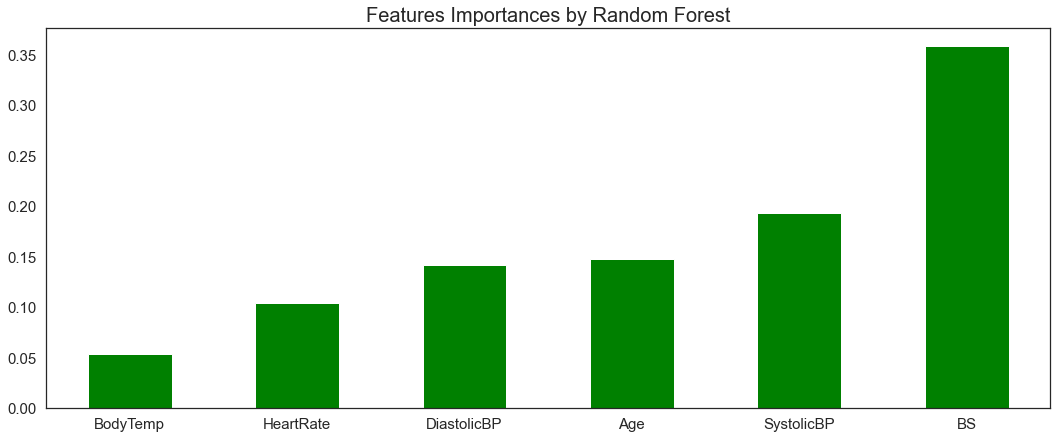

In [81]:
X = df[df.columns.drop("RiskLevel")]
y = df["RiskLevel"]

sns.set_style("white")
rf=RandomForestClassifier()
rf.fit(X, y)
imp = pd.Series(data = rf.feature_importances_, index = X.columns)
imp_sorted = imp.sort_values()
imp_sorted.plot(kind = "bar", color = "green", figsize = (18, 7))
plt.title("Features Importances by Random Forest", size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15, rotation = 0)
plt.savefig("Feature_Importance.png")
plt.show()

**Statistics by Low Risk**

In [10]:
low_risk = df[df["RiskLevel"] == "low risk"]
low_risk.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,30.947195,109.610561,75.650165,7.219208,98.164356,72.673267
std,12.815444,13.609021,11.802867,0.676670,0.782962,7.085722
min,18.000000,75.000000,50.000000,6.100000,98.000000,60.000000
25%,22.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.200000,98.000000,70.000000
75%,35.000000,120.000000,85.000000,7.500000,98.000000,77.000000
max,70.000000,129.000000,100.000000,11.000000,103.000000,88.000000


**Statistics by Mid Risk**

In [11]:
mid_risk = df[df["RiskLevel"] == "mid risk"]
mid_risk.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,30.918728,116.289753,75.936396,7.902014,98.604240,74.077739
std,12.026438,13.162142,10.706738,2.448276,1.225722,6.732553
min,18.000000,85.000000,60.000000,6.000000,98.000000,60.000000
25%,22.000000,120.000000,70.000000,6.800000,98.000000,70.000000
50%,29.000000,120.000000,80.000000,7.000000,98.000000,76.000000
75%,34.000000,120.000000,80.000000,7.800000,98.000000,78.000000
max,60.000000,140.000000,100.000000,18.000000,102.000000,88.000000


**Statistics by High Risk**

In [12]:
high_risk = df[df["RiskLevel"] == "high risk"]
high_risk.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,39.480851,128.727660,88.000000,12.681915,98.457872,77.212766
std,10.832182,17.247887,12.508117,4.151255,1.136220,8.741629
min,19.000000,83.000000,60.000000,6.800000,98.000000,60.000000
25%,32.000000,120.000000,80.000000,8.000000,98.000000,70.000000
50%,40.000000,140.000000,90.000000,12.000000,98.000000,77.000000
75%,49.500000,140.000000,100.000000,16.000000,98.000000,86.000000
max,65.000000,160.000000,100.000000,19.000000,102.000000,90.000000


# Data Visualization

**Distribution of Age**

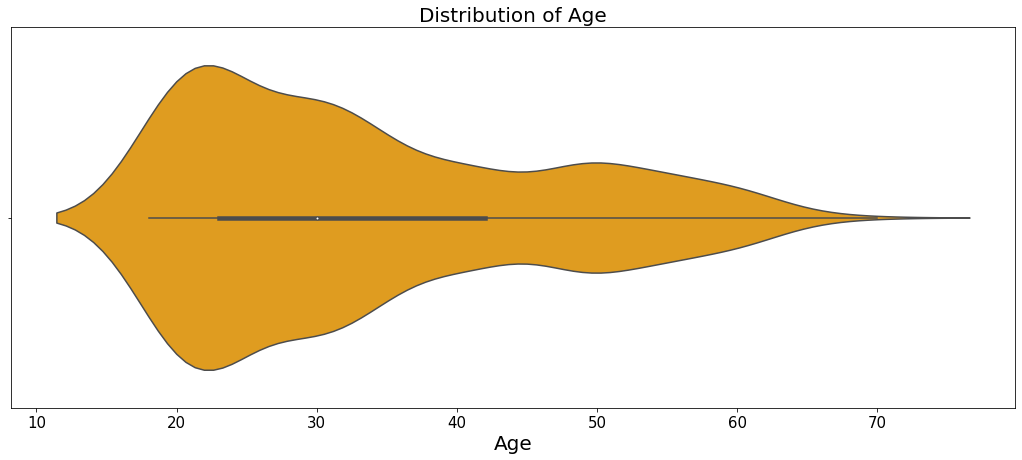

In [13]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Age", data = df, color = "orange")
plt.title("Distribution of Age", size = 20)
plt.xlabel("Age", size = 20)
plt.xticks(size = 15)
plt.savefig("Age_Distribution.png")
plt.show()

**Distribution of Systolic Blood Pressure**

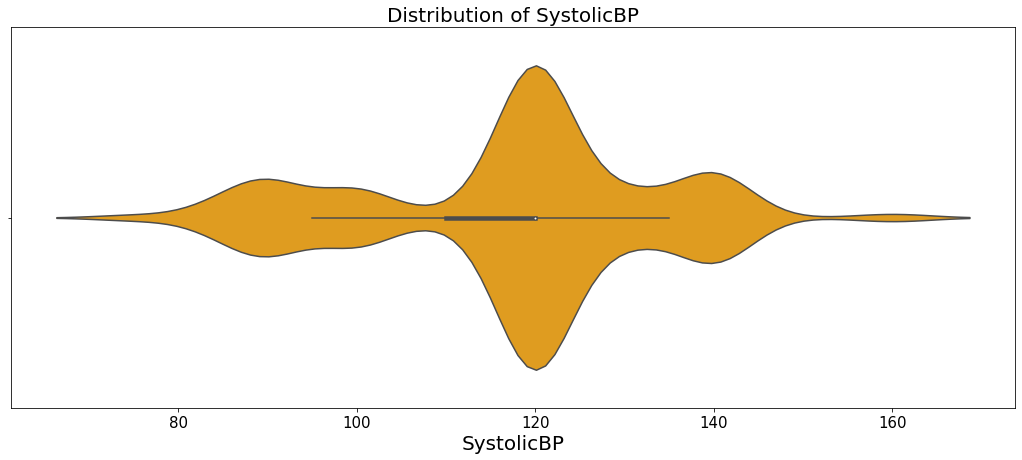

In [14]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "SystolicBP", data = df, color = "orange")
plt.title("Distribution of SystolicBP", size = 20)
plt.xlabel("SystolicBP", size = 20)
plt.xticks(size = 15)
plt.savefig("SystolicBP_Distribution.png")
plt.show()

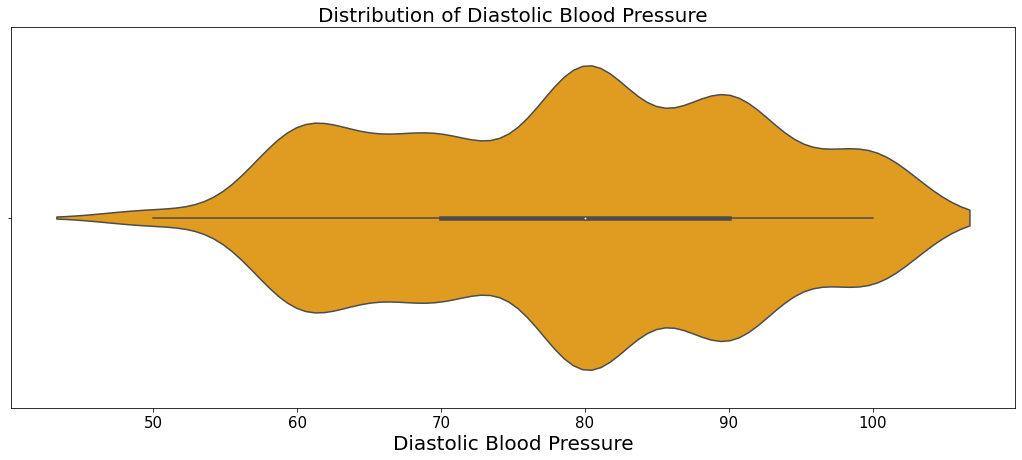

In [15]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "DiastolicBP", data = df, color = "orange")
plt.title("Distribution of Diastolic Blood Pressure", size = 20)
plt.xlabel("Diastolic Blood Pressure", size = 20)
plt.xticks(size = 15)
plt.savefig("DiastolicBP_Distribution.png")
plt.show()

**Distribution of Blood Sugar**

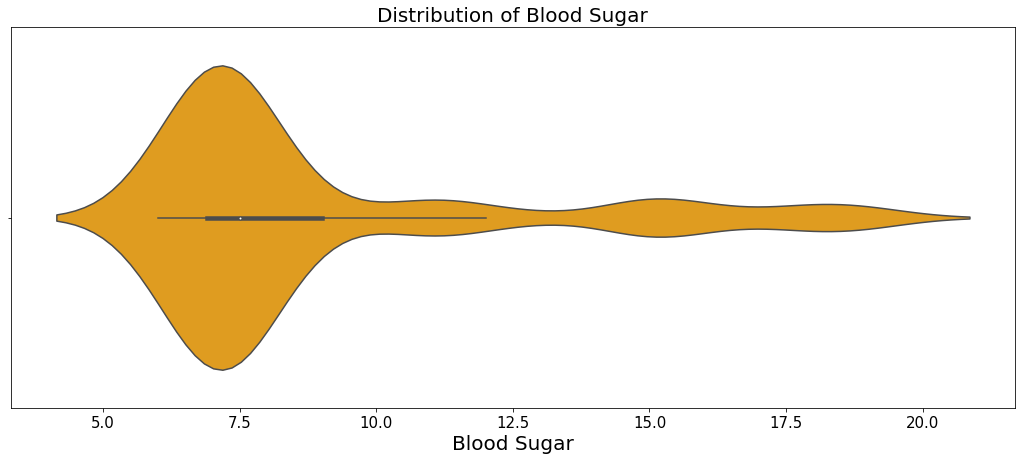

In [16]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "BS", data = df, color = "orange")
plt.title("Distribution of Blood Sugar", size = 20)
plt.xlabel("Blood Sugar", size = 20)
plt.xticks(size = 15)
plt.savefig("BloodSugar_Distribution.png")
plt.show()

**Body Temperature**

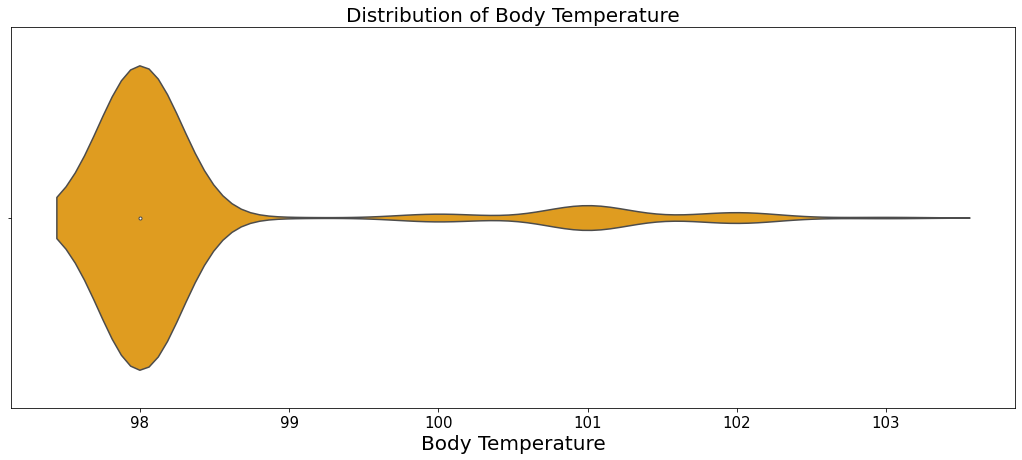

In [17]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "BodyTemp", data = df, color = "orange")
plt.title("Distribution of Body Temperature", size = 20)
plt.xlabel("Body Temperature", size = 20)
plt.xticks(size = 15)
plt.savefig("Body_Temperature_Distribution.png")
plt.show()

**Distribution of Heart Rate**

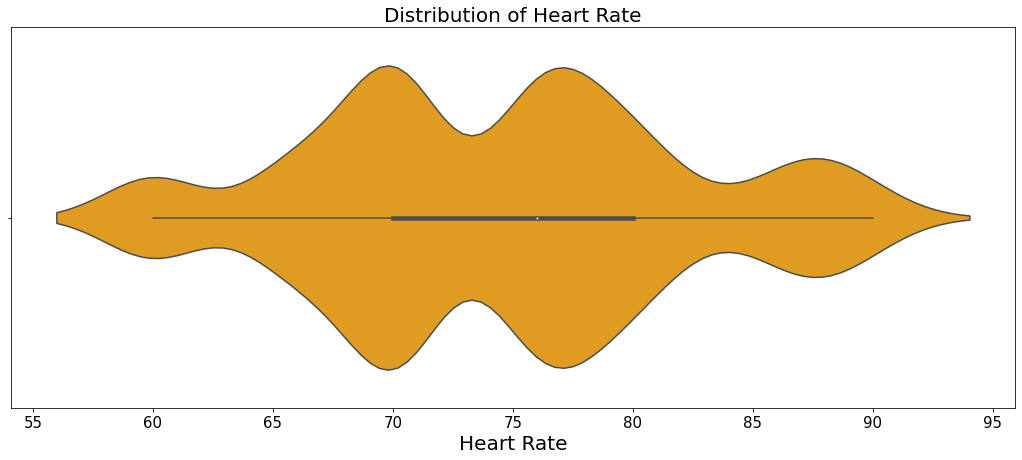

In [18]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "HeartRate", data = df, color = "orange")
plt.title("Distribution of Heart Rate", size = 20)
plt.xlabel("Heart Rate", size = 20)
plt.xticks(size = 15)
plt.savefig("Heart_Rate_Distribution.png")
plt.show()

**Distribution of Age by Risk Level**

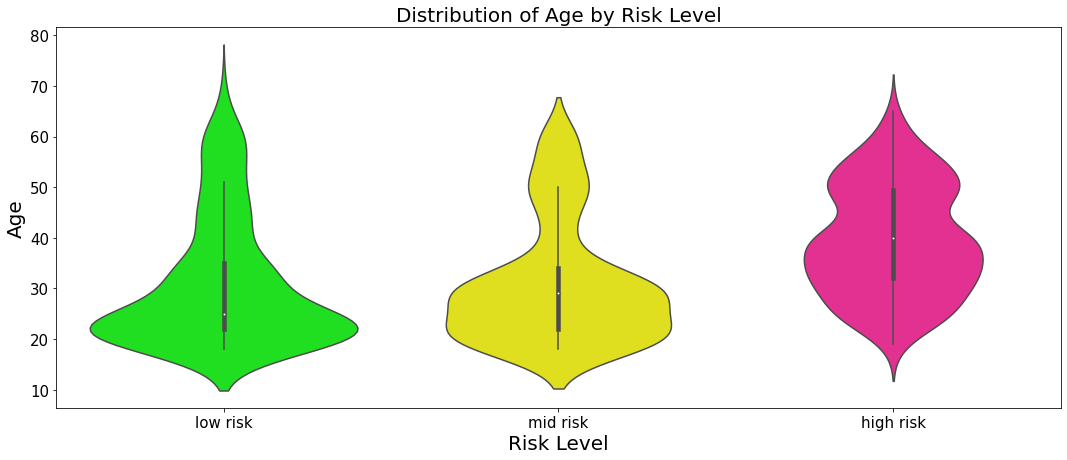

In [19]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.violinplot(x = "RiskLevel", y = "Age", data = df, palette = colors, order = ["low risk", "mid risk", "high risk"])
plt.title("Distribution of Age by Risk Level", size = 20)
plt.xlabel("Risk Level", size = 20)
plt.ylabel("Age", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Age_Risk.png")
plt.show()

**Distribution of Systolic Blood Pressure by Risk Level**

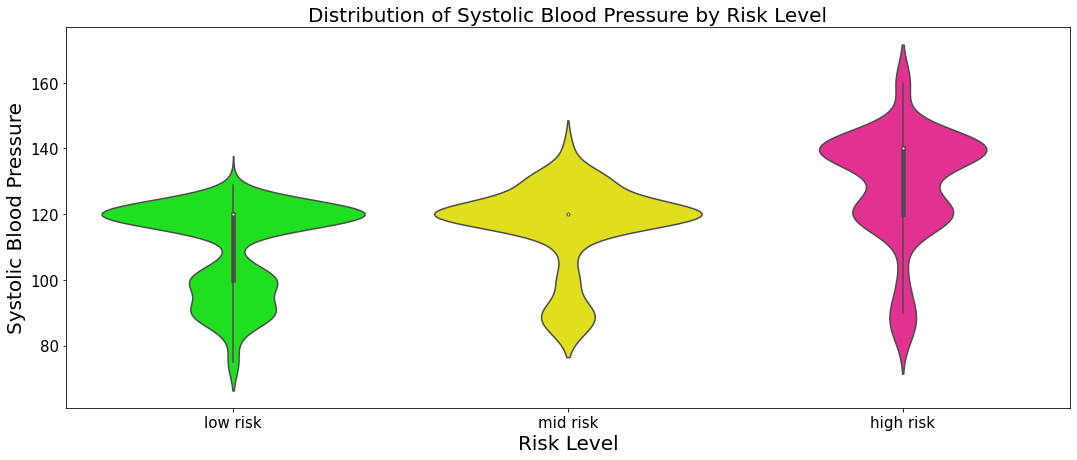

In [20]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
sns.violinplot(x = "RiskLevel", y = "SystolicBP", data = df, palette = colors, order = ["low risk", "mid risk", "high risk"])
plt.title("Distribution of Systolic Blood Pressure by Risk Level", size = 20)
plt.xlabel("Risk Level", size = 20)
plt.ylabel("Systolic Blood Pressure", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Systolic_Risk.png")
plt.show()

**Distribution of Diastolic Blood Pressure by Risk Level**

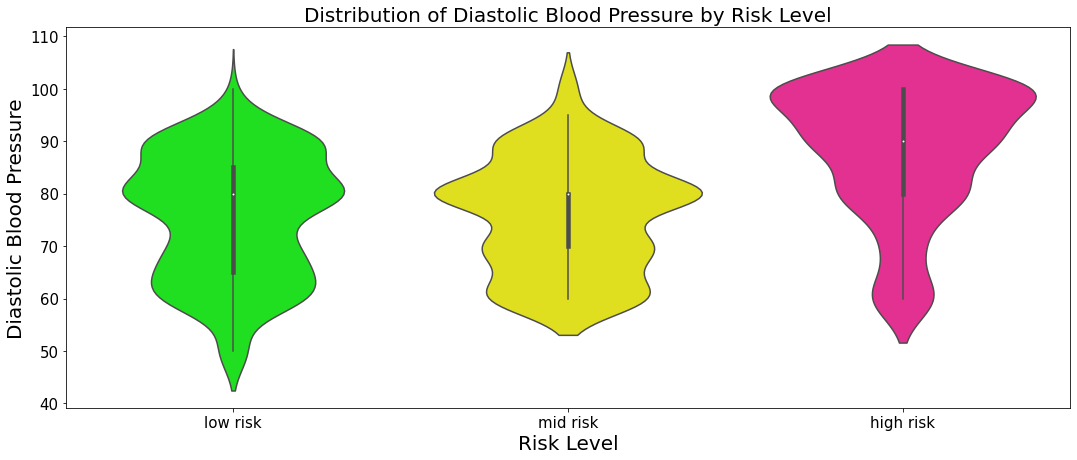

In [21]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
sns.violinplot(x = "RiskLevel", y = "DiastolicBP", data = df, palette = colors, order = ["low risk", "mid risk", "high risk"])
plt.title("Distribution of Diastolic Blood Pressure by Risk Level", size = 20)
plt.xlabel("Risk Level", size = 20)
plt.ylabel("Diastolic Blood Pressure", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Diastolic_Risk.png")
plt.show()

**Distribution of Blood Sugar by Risk Level**

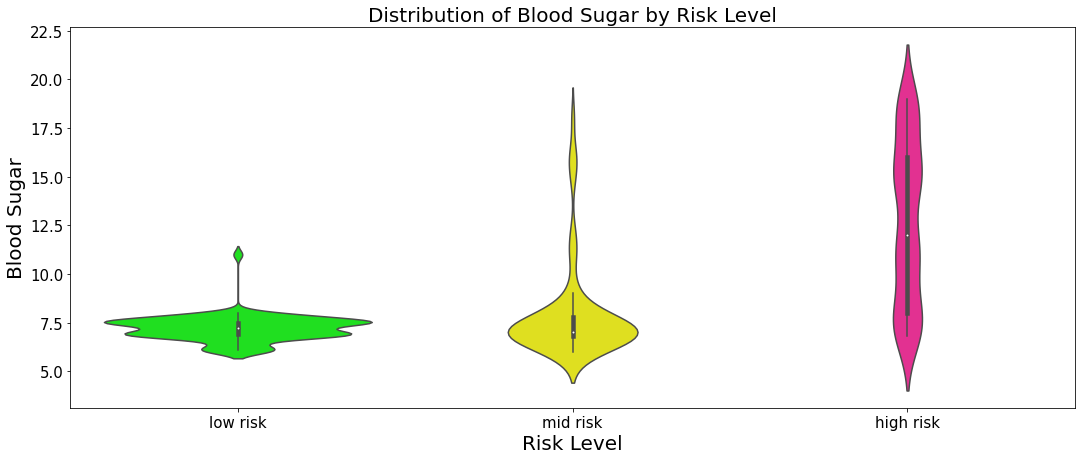

In [22]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
sns.violinplot(x = "RiskLevel", y = "BS", data = df, palette = colors, order = ["low risk", "mid risk", "high risk"])
plt.title("Distribution of Blood Sugar by Risk Level", size = 20)
plt.xlabel("Risk Level", size = 20)
plt.ylabel("Blood Sugar", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Blood_Sugar_Risk.png")
plt.show()

**Distribution of Body Temperature by Risk Level**

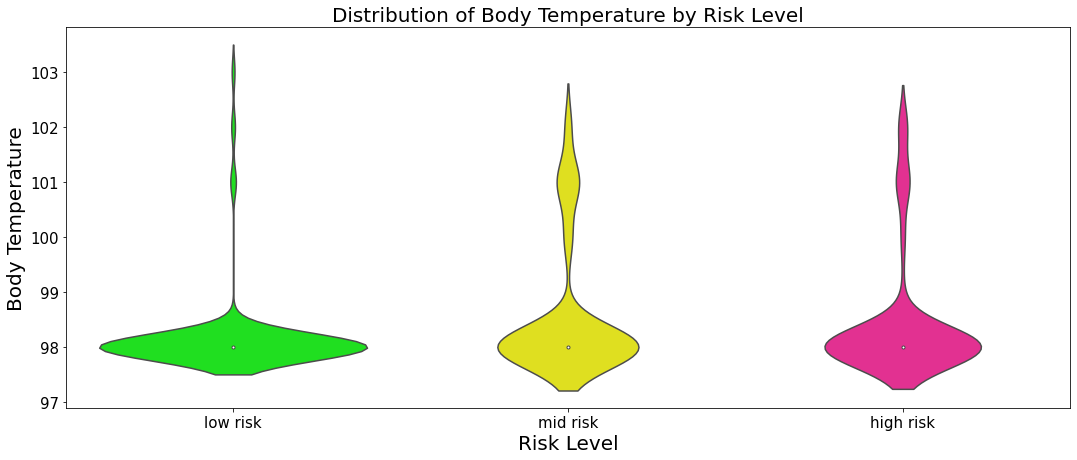

In [23]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
sns.violinplot(x = "RiskLevel", y = "BodyTemp", data = df, palette = colors, order = ["low risk", "mid risk", "high risk"])
plt.title("Distribution of Body Temperature by Risk Level", size = 20)
plt.xlabel("Risk Level", size = 20)
plt.ylabel("Body Temperature", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Body_Temp_Risk.png")
plt.show()

**Distribution of Heart Rate by Risk Level**

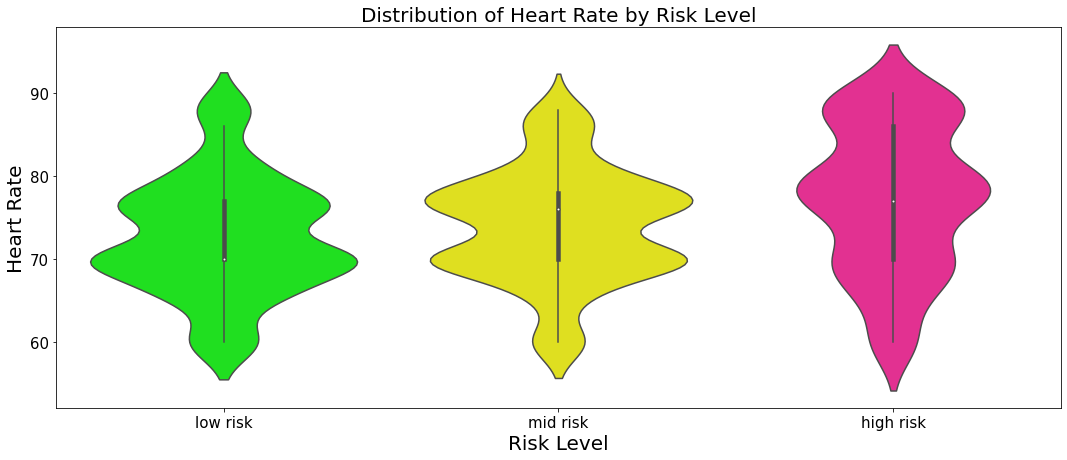

In [24]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
sns.violinplot(x = "RiskLevel", y = "HeartRate", data = df, palette = colors, order = ["low risk", "mid risk", "high risk"])
plt.title("Distribution of Heart Rate by Risk Level", size = 20)
plt.xlabel("Risk Level", size = 20)
plt.ylabel("Heart Rate", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Heart_Rate_Risk.png")
plt.show()

**Relationship of Age and Systolic Blood Pressure by Risk Level**

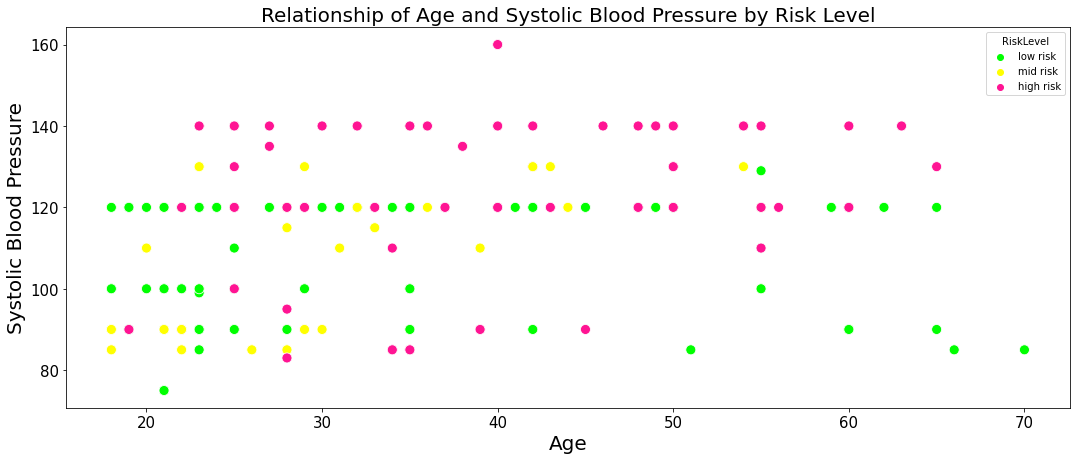

In [25]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "Age", y = "SystolicBP", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Age and Systolic Blood Pressure by Risk Level", size = 20)
plt.xlabel("Age", size = 20)
plt.ylabel("Systolic Blood Pressure", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Age_SystolicBP_Risk.png")
plt.show()

**Relationship of Age and Diastolic Blood Pressure by Risk Level**

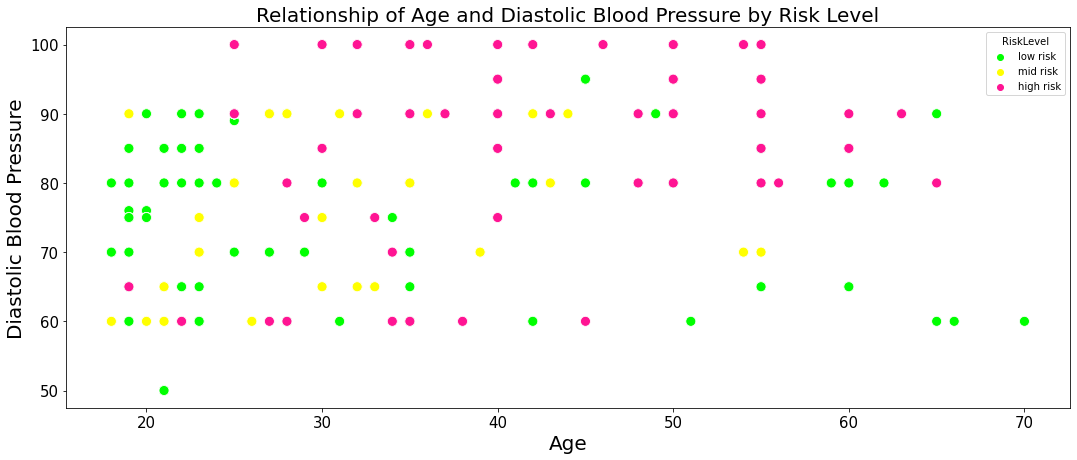

In [26]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "Age", y = "DiastolicBP", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Age and Diastolic Blood Pressure by Risk Level", size = 20)
plt.xlabel("Age", size = 20)
plt.ylabel("Diastolic Blood Pressure", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Age_DiastolicBP_Risk.png")
plt.show()

**Relationship of Age and Blood Sugar by Risk Level**

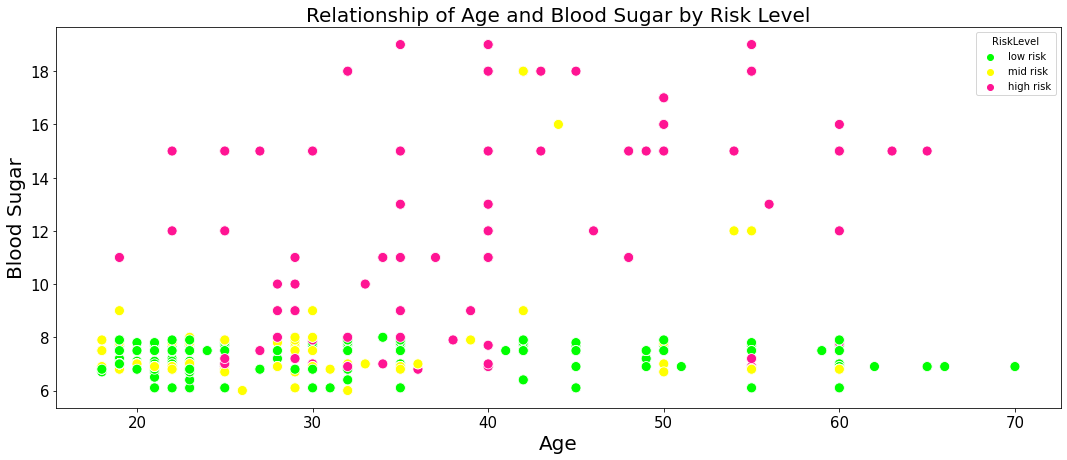

In [27]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "Age", y = "BS", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Age and Blood Sugar by Risk Level", size = 20)
plt.xlabel("Age", size = 20)
plt.ylabel("Blood Sugar", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Age_BS_Risk.png")
plt.show()

**Relationship of Age and Body Temperature by Risk Level**

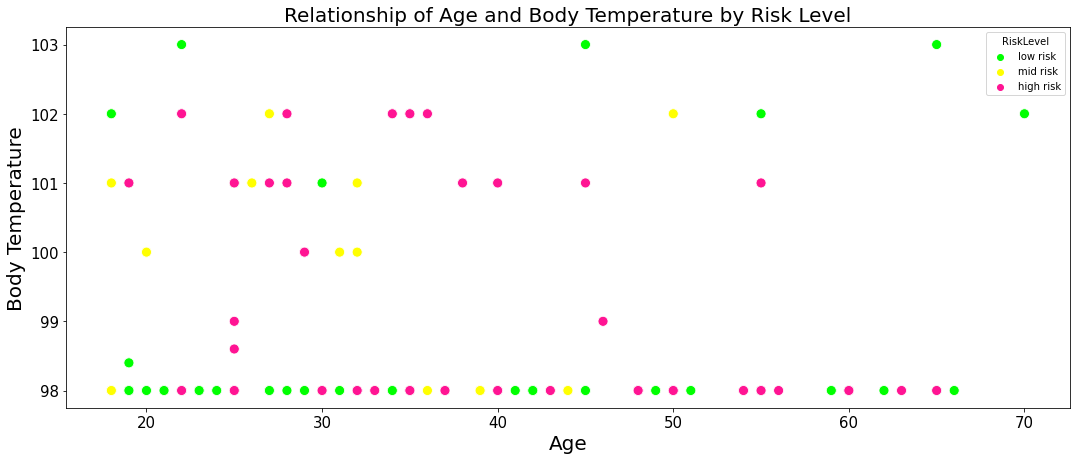

In [28]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "Age", y = "BodyTemp", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Age and Body Temperature by Risk Level", size = 20)
plt.xlabel("Age", size = 20)
plt.ylabel("Body Temperature", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Age_BodyTemp_Risk.png")
plt.show()

**Relationship of Age and Heart Rate by Risk Level**

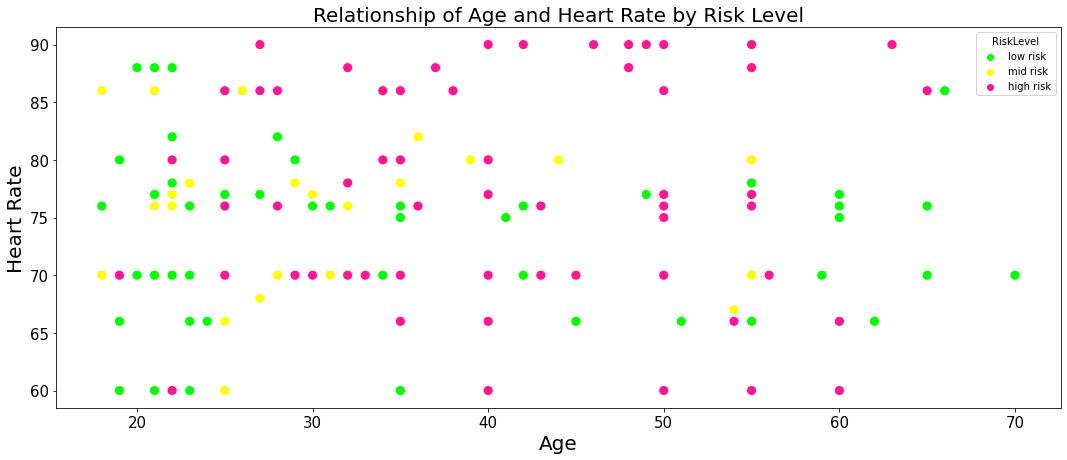

In [29]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "Age", y = "HeartRate", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Age and Heart Rate by Risk Level", size = 20)
plt.xlabel("Age", size = 20)
plt.ylabel("Heart Rate", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Age_HeartRate_Risk.png")
plt.show()

**Relationship of Systolic Blood Pressure and Diastolic Blood Pressure by Risk Level**

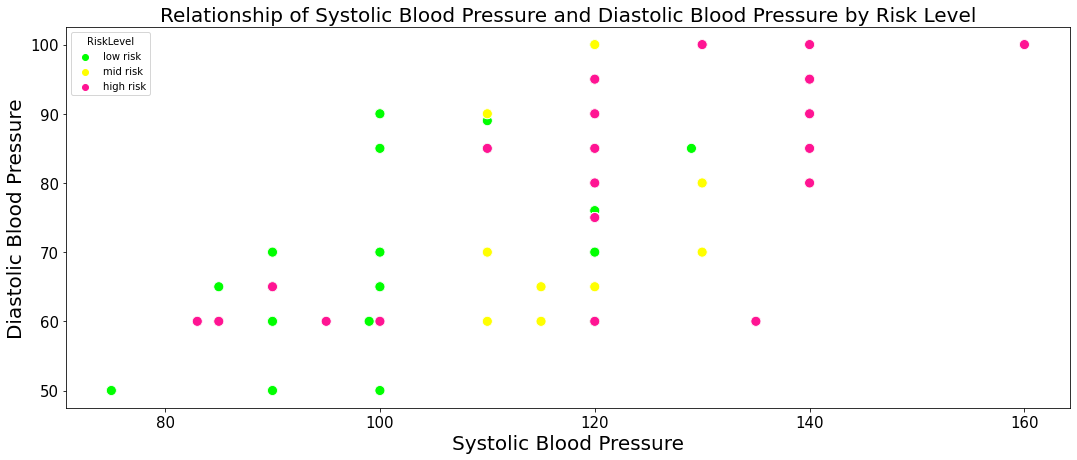

In [30]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "SystolicBP", y = "DiastolicBP", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Systolic Blood Pressure and Diastolic Blood Pressure by Risk Level", size = 20)
plt.xlabel("Systolic Blood Pressure", size = 20)
plt.ylabel("Diastolic Blood Pressure", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("SBP_DBP_Risk.png")
plt.show()

**Relationship of Systolic Blood Pressure and Blood Sugar**

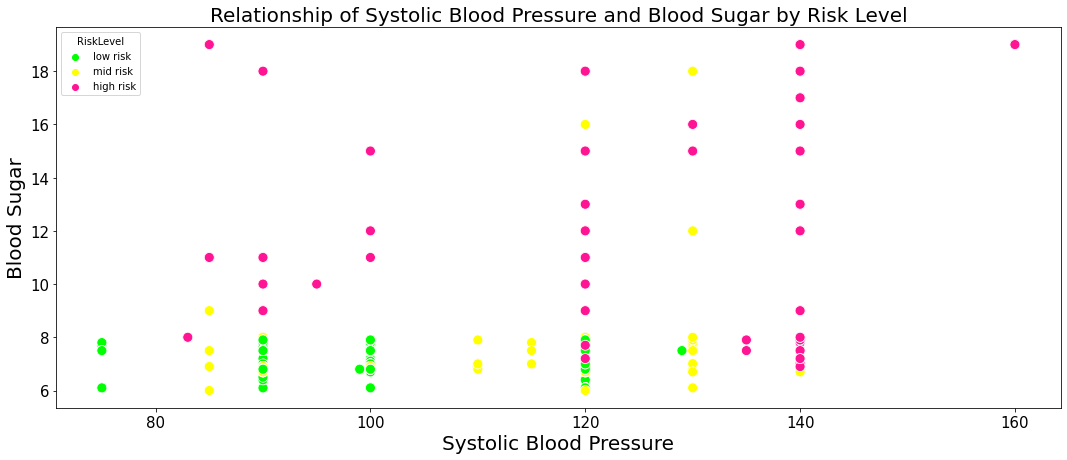

In [31]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "SystolicBP", y = "BS", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Systolic Blood Pressure and Blood Sugar by Risk Level", size = 20)
plt.xlabel("Systolic Blood Pressure", size = 20)
plt.ylabel("Blood Sugar", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("SBP_BS_Risk.png")
plt.show()

**Relationship of Systolic Blood Pressure and Body Temperature**

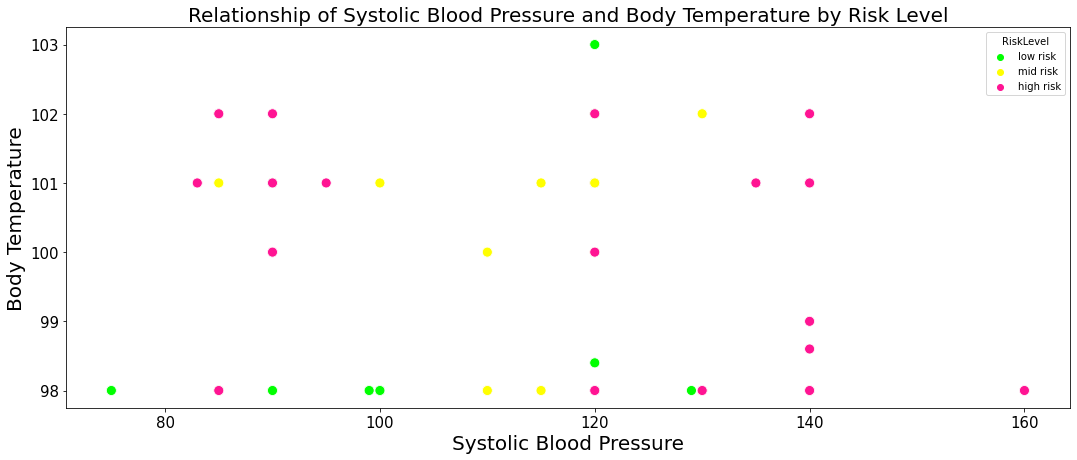

In [32]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "SystolicBP", y = "BodyTemp", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Systolic Blood Pressure and Body Temperature by Risk Level", size = 20)
plt.xlabel("Systolic Blood Pressure", size = 20)
plt.ylabel("Body Temperature", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("SBP_BT_Risk.png")
plt.show()

**Relationship of Systolic Blood Pressure and Heart Rate by Risk Level**

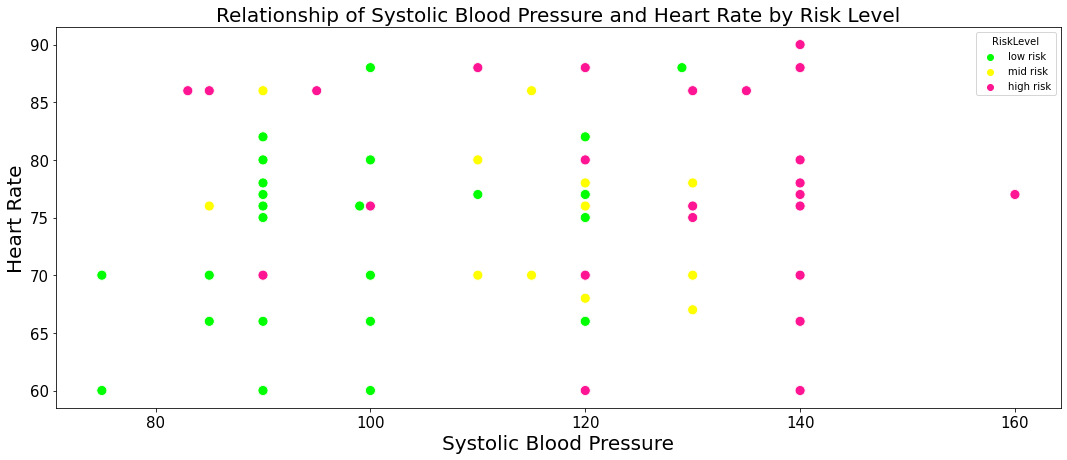

In [33]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "SystolicBP", y = "HeartRate", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Systolic Blood Pressure and Heart Rate by Risk Level", size = 20)
plt.xlabel("Systolic Blood Pressure", size = 20)
plt.ylabel("Heart Rate", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("SBP_HR_Risk.png")
plt.show()

**Relationship of Diastolic Blood Pressure and Blood Sugar by Risk Level**

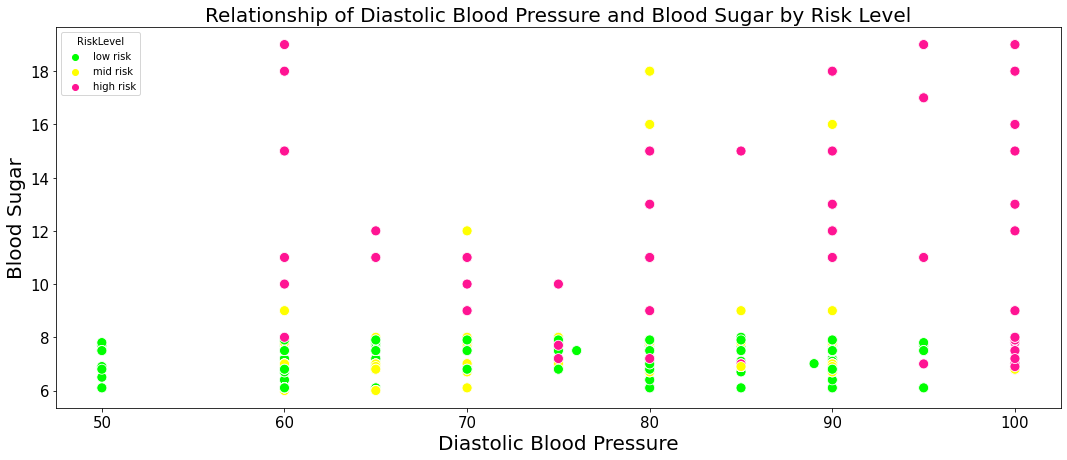

In [34]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "DiastolicBP", y = "BS", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Diastolic Blood Pressure and Blood Sugar by Risk Level", size = 20)
plt.xlabel("Diastolic Blood Pressure", size = 20)
plt.ylabel("Blood Sugar", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("DBP_BS_Risk.png")
plt.show()

**Relationship of Diastolic Blood Pressure and Body Temperature by Risk Level**

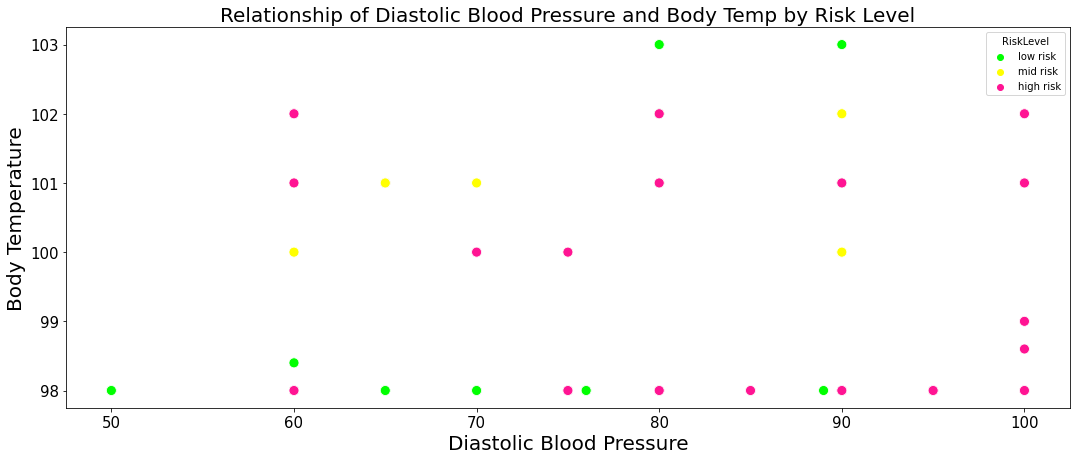

In [35]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "DiastolicBP", y = "BodyTemp", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Diastolic Blood Pressure and Body Temp by Risk Level", size = 20)
plt.xlabel("Diastolic Blood Pressure", size = 20)
plt.ylabel("Body Temperature", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("DBP_BT_Risk.png")
plt.show()

**Relationship of Diastolic Blood Pressure and Heart Rate by Risk Level**

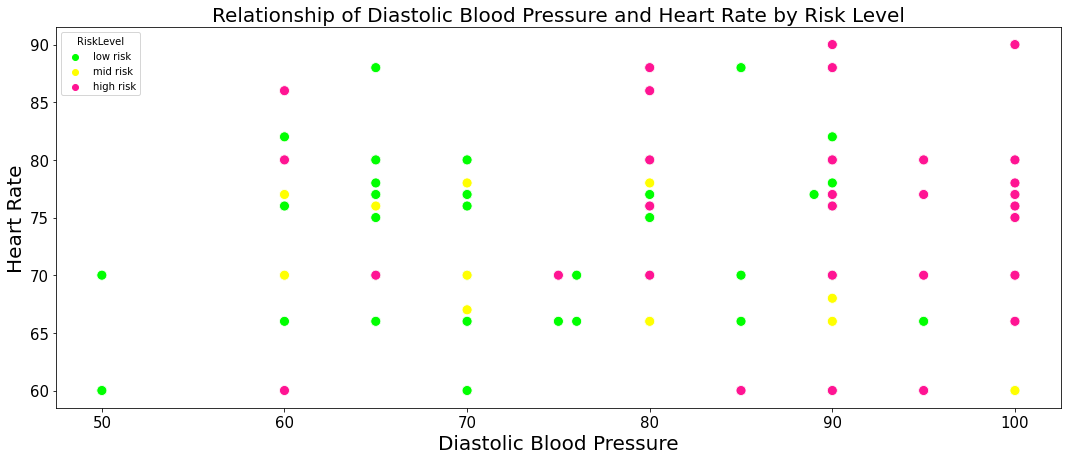

In [36]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "DiastolicBP", y = "HeartRate", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Diastolic Blood Pressure and Heart Rate by Risk Level", size = 20)
plt.xlabel("Diastolic Blood Pressure", size = 20)
plt.ylabel("Heart Rate", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("DBP_HR_Risk.png")
plt.show()

**Relationship of Blood Sugar and Body Temperature by Risk Level**

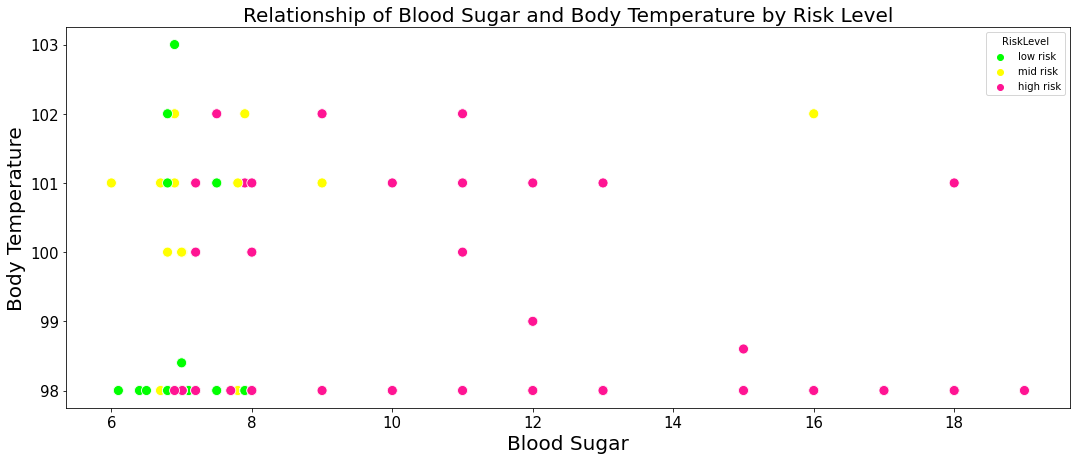

In [37]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "BS", y = "BodyTemp", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Blood Sugar and Body Temperature by Risk Level", size = 20)
plt.xlabel("Blood Sugar", size = 20)
plt.ylabel("Body Temperature", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("BS_BT_Risk.png")
plt.show()

**Relationship of Blood Sugar and Heart Rate by Risk Level**

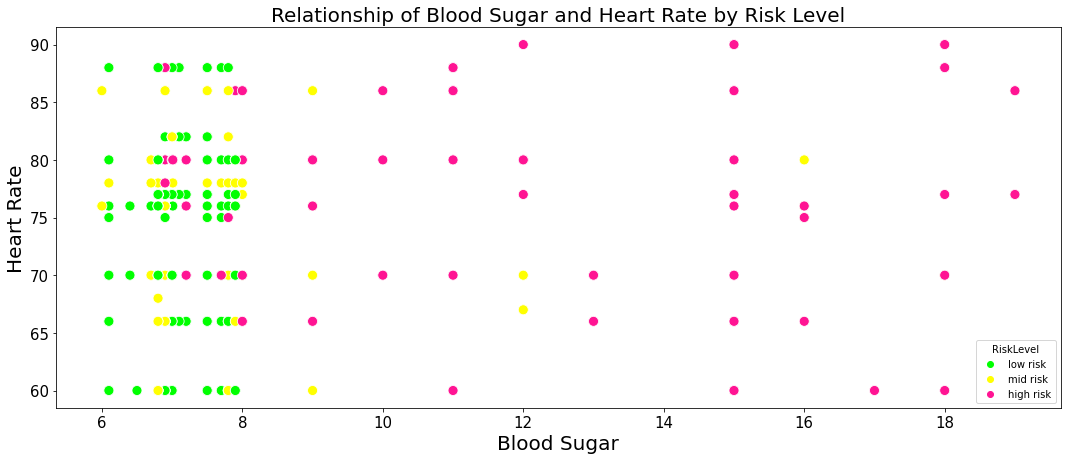

In [38]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "BS", y = "HeartRate", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of Blood Sugar and Heart Rate by Risk Level", size = 20)
plt.xlabel("Blood Sugar", size = 20)
plt.ylabel("Heart Rate", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("BS_HR_Risk.png")
plt.show()

**Relationship of Body Temperature and Heart Rate by Risk Level**

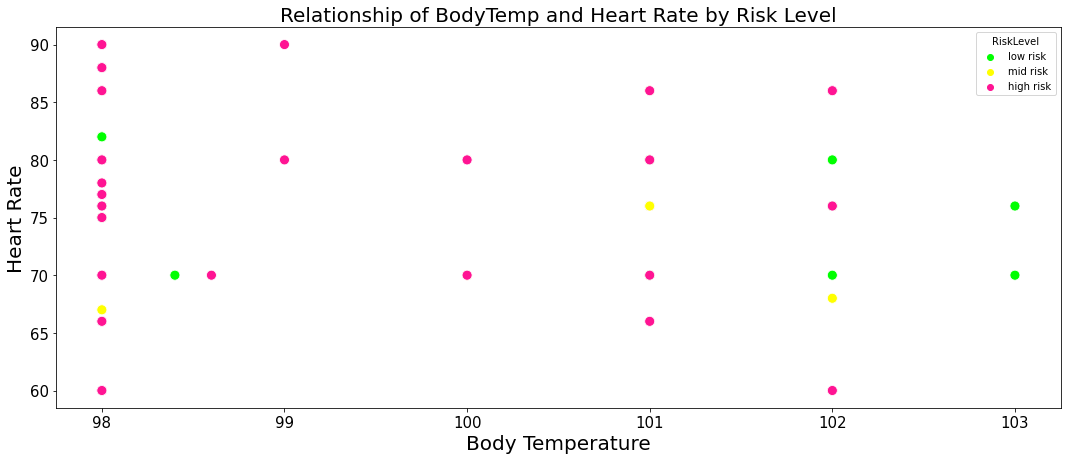

In [39]:
plt.figure(figsize = (18, 7))
colors = {"low risk": "lime", "mid risk": "yellow", "high risk": "deeppink"}
order = ["low risk", "mid risk", "high risk"]
sns.scatterplot(x = "BodyTemp", y = "HeartRate", hue = "RiskLevel", data = df, s = 100, palette = colors, hue_order = order)
plt.title("Relationship of BodyTemp and Heart Rate by Risk Level", size = 20)
plt.xlabel("Body Temperature", size = 20)
plt.ylabel("Heart Rate", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Body_Temp_HR_Risk.png")
plt.show()

### Prepare Data for Modeling

In [40]:
# Features
X = df[df.columns.drop("RiskLevel")]

#Target
y = df["RiskLevel"]

In [41]:
# Split Data into Training Set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 12)

### Bagging classifier with decision tree classifier

**Apply grid search cross validation on decision tree**

In [42]:
params = {"max_depth": np.arange(1, 50)}

dt = DecisionTreeClassifier(criterion = "gini", random_state = 12)

cv_dt = GridSearchCV(dt, params)

cv_dt.fit(X_train, y_train)

cv_dt.best_params_

{'max_depth': 15}

In [44]:
cv_dt.best_score_

0.8079574369650706

**Apply grid search cross validation on bagging classifier with Decision Tree Classifier (Default Parameters)**

In [45]:
params = {"n_estimators": np.arange(10, 101, 10)}

bgc_dtd = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini"), random_state = 12)

cv_bg_dtd = GridSearchCV(bgc_dtd, params)

cv_bg_dtd.fit(X_train, y_train)

cv_bg_dtd.best_params_

{'n_estimators': 40}

In [46]:
cv_bg_dtd.best_score_

0.8247397640527412

**Apply grid search cross validation on bagging classifier with Decision Tree Classifier (Best Parameters)**

In [47]:
params = {"n_estimators": np.arange(10, 101, 10)}

bgc_dt = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 15, criterion = "gini"), random_state = 12)

cv_bg_dt = GridSearchCV(bgc_dtd, params)

cv_bg_dt.fit(X_train, y_train)

cv_bg_dt.best_params_

{'n_estimators': 40}

In [48]:
cv_bg_dt.best_score_

0.8247397640527412

**Use best parameters of bagging classifier with decision tree for prediction**

In [49]:
bg_dt = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini", max_depth = 15, random_state = 12),
                          n_estimators = 40)

bg_dt.fit(X_train, y_train)

pred_bg_dt = bg_dt.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_bg_dt}).sample(5)

,Actual,Predicted
502,high risk,high risk
718,mid risk,mid risk
315,low risk,low risk
257,low risk,mid risk
265,low risk,low risk


**Confusion matrix of bagging classifier with decision tree classifier**

In [50]:
pd.DataFrame(confusion_matrix(y_test, pred_bg_dt))

,0,1,2
0,44,1,2
1,2,48,11
2,3,7,47


**Classification report bagging with decision tree**

In [51]:
print(classification_report(y_test, pred_bg_dt))

              precision    recall  f1-score   support

   high risk       0.90      0.94      0.92        47
    low risk       0.86      0.79      0.82        61
    mid risk       0.78      0.82      0.80        57

    accuracy                           0.84       165
   macro avg       0.85      0.85      0.85       165
weighted avg       0.84      0.84      0.84       165



### Adaboost classifier with random forest classifier

**Apply grid search cross validation on random forest classifier**

In [54]:
params = {"max_depth": np.arange(1, 20),
          "n_estimators": np.arange(10, 101, 10)}

rf = RandomForestClassifier(criterion = "gini", random_state = 12)

rf_cv = GridSearchCV(rf, params)

rf_cv.fit(X_train, y_train)

rf_cv.best_params_

{'max_depth': 14, 'n_estimators': 50}

In [55]:
rf_cv.best_score_

0.8232130464954892

**Apply grid search cross validation on adaboost classifier with random forest classifier**

In [57]:
params = {"n_estimators": np.arange(10, 101, 10),
          "learning_rate": [0.001, 0.01, 0.1, 1]}

adc_rf = AdaBoostClassifier(base_estimator = RandomForestClassifier(criterion = "gini"), random_state = 12)

adc_rfd_cv = GridSearchCV(adcd, params)

adc_rfd_cv.fit(X_train, y_train)

adc_rfd_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 80}

In [58]:
adc_rfd_cv.best_score_

0.8232130464954892

**Apply grid search cross validation on adaboost classifier with best parameters of random forest classifier**

In [59]:
params = {"n_estimators": np.arange(10, 101, 10),
          "learning_rate": [0.001, 0.01, 0.1, 1]}

adc_rfb = AdaBoostClassifier(base_estimator = RandomForestClassifier(criterion = "gini",
                                                                     max_depth = 14,
                                                                     n_estimators = 50), random_state = 12)

adc_rfb_cv = GridSearchCV(adc_rfb, params)

adc_rfb_cv.fit(X_train, y_train)

adc_rfb_cv.best_params_

{'learning_rate': 1, 'n_estimators': 10}

In [60]:
adc_rfb_cv.best_score_

0.8369072403423548

**Use best parameters of adaboost classifier with random forest classifier**

In [61]:
adc_rf = AdaBoostClassifier(base_estimator = RandomForestClassifier(criterion = "gini",
                                                                     max_depth = 14,
                                                                     n_estimators = 50),
                            learning_rate = 1,
                            n_estimators = 10,
                            random_state = 12)

adc_rf.fit(X_train, y_train)

pred_adc_rf = adc_rf.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_adc_rf}).sample(5)

,Actual,Predicted
315,low risk,low risk
515,low risk,low risk
101,mid risk,mid risk
613,high risk,mid risk
689,high risk,high risk


**Confusion matrix of adaboost classifier with random forest classifier**

In [65]:
pd.DataFrame(confusion_matrix(y_test, pred_adc_rf))

,0,1,2
0,43,2,2
1,3,50,8
2,3,7,47


**Classification report of adaboost classifier with random forest classifier**

In [66]:
print(classification_report(y_test, pred_adc_rf))

              precision    recall  f1-score   support

   high risk       0.88      0.91      0.90        47
    low risk       0.85      0.82      0.83        61
    mid risk       0.82      0.82      0.82        57

    accuracy                           0.85       165
   macro avg       0.85      0.85      0.85       165
weighted avg       0.85      0.85      0.85       165



### Voting Classifier

**Apply grid search cross validation on gradient boosting classifier**

In [67]:
params = {"learning_rate": [0.01, 0.1, 1],
          "n_estimators": np.arange(10, 101, 10),
          "max_depth": np.arange(1, 15)}

gb = GradientBoostingClassifier(random_state = 12)

cv_gb = GridSearchCV(gb, params)

cv_gb.fit(X_train, y_train)

cv_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10}

**Classifiers**

In [68]:
# Classifiers
classifiers = [("BC_DT Classifier", bg_dt),
               
               ("AD_RF Classifier", adc_rf),
               
               ("GB Classifier", GradientBoostingClassifier(learning_rate = 0.1,
                                                            n_estimators = 10,
                                                            max_depth = 10,
                                                            random_state = 12))]

vc = VotingClassifier(estimators = classifiers)

vc.fit(X_train, y_train)

# Evaluate the test set predictions
vc_pred = vc.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": vc_pred}).head()

,Actual,Predicted
955,high risk,high risk
515,low risk,low risk
243,mid risk,mid risk
728,mid risk,mid risk
615,high risk,mid risk


In [69]:
pd.DataFrame(confusion_matrix(y_test, vc_pred))

,0,1,2
0,44,1,2
1,2,50,9
2,3,7,47


In [70]:
print(classification_report(y_test, vc_pred))

              precision    recall  f1-score   support

   high risk       0.90      0.94      0.92        47
    low risk       0.86      0.82      0.84        61
    mid risk       0.81      0.82      0.82        57

    accuracy                           0.85       165
   macro avg       0.86      0.86      0.86       165
weighted avg       0.85      0.85      0.85       165



### Deployment

In [75]:
filename = "voting_classifier.sav"
pickle.dump(vc, open(filename, "wb"))

**Load Model**

In [76]:
loaded_model = pickle.load(open("voting_classifier.sav", "rb"))